# Hypothesis Testing

### Homework Solutions

Before you begin, remember to import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
def abtest(df, exp_groups, exp_metric, n_rounds=2000, alpha=0.05): 

    a, b = df[exp_groups].unique()
    mu_a = np.mean(df[df[exp_groups]==a][exp_metric])
    mu_b = np.mean(df[df[exp_groups]==b][exp_metric])
    ab_mu_diff = mu_a - mu_b
    print('Observed difference statistic:', round(ab_mu_diff, 4))
    
    np.random.seed(1)
    mu_diff_samples = []
    for i in range(n_rounds): 
        # extract a subsample of 50% of data without replacement
        df_sample1 = df.sample(frac=0.5, replace=False)
        # use set() to get indexes of rows that were not extracted from df in previous step
        ix2 = set(df.index) - set(df_sample1.index)
        # create dataframe with other 50% of data
        df_sample2 = df.iloc[list(ix2)]
        # calculate difference in mean from each sample
        mu_diff_temp = np.mean(df_sample1[exp_metric]) - np.mean(df_sample2[exp_metric])
        # append sampled mean difference to mu_diff_samples list
        mu_diff_samples.append(mu_diff_temp)
    
    sns.histplot(mu_diff_samples)
    plt.axvline(ab_mu_diff, 0, 1, color='r', linestyle='--')
    plt.show()
    
    print('Values more extreme than observed:', sum([el >= ab_mu_diff for el in mu_diff_samples]))
    p_value = sum([el > ab_mu_diff for el in mu_diff_samples])/n_rounds
    print('p-value:', p_value)
    
    if p_value <= alpha: 
        print('H0 rejected | the observed result is statistically significant | p-value <= alpha')
    else: 
        print('H0 accepted | the observed result is not statistically significant | p-value > alpha')
        
    #return {'samples': mu_diff_samples, 'pvalue': p_value}

Load the `homework-ab-test-data.csv` dataset from the `data` folder to a DataFrame object named `df`. The dataset contains the results of an AB test conducted on the title of an article that runs on the homepage of your website. Specifically, you think that rather than leaving the current title ("title_control"), changing it to an improved version ("title_test") would increase the interest and engagement of your visitors. 

1. After you've analysed the data and produced some appropriate preliminary descriptive statistic (count, sum, mean, ...) of the `time_on_homepage` metric for each group in the experiment, test the hypothesis (using a permutation test) that the "title_test" page resulted in a significantly higher average `time_on_homepage`. Make sure you print the test statistic, an histogram of the sampled distribution, the p-value and choose an appropriate alpha level. Then state your conclusions.

In [3]:
df = pd.read_csv('data/homework-ab-test-data.csv')

In [4]:
df.head()

,id,visit_date,group,time_on_homepage,clicked_article
0,uid1,2018-04-01,title_test,49.011609,0
1,uid2,2018-04-01,title_test,48.864515,0
2,uid3,2018-04-01,title_test,49.074667,0
3,uid4,2018-04-01,title_test,49.260109,1
4,uid5,2018-04-01,title_test,50.371898,1


In [5]:
df.groupby('group').describe().T

group                   title_control    title_test
time_on_homepage count   15000.000000  15000.000000
                 mean       49.994889     49.999093
                 std         1.000167      1.006684
                 min        46.095672     46.245660
                 25%        49.328043     49.322190
                 50%        49.996765     50.003084
                 75%        50.666190     50.672819
                 max        54.023849     53.937622
clicked_article  count   15000.000000  15000.000000
                 mean        0.069067      0.166267
                 std         0.253576      0.372332
                 min         0.000000      0.000000
                 25%         0.000000      0.000000
                 50%         0.000000      0.000000
                 75%         0.000000      0.000000
                 max         1.000000      1.000000

Observed difference statistic: 0.0042


/Users/alket/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


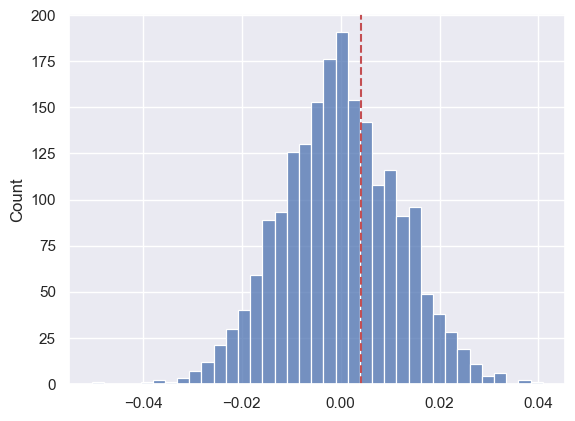

Values more extreme than observed: 687
p-value: 0.3435
H0 accepted | the observed result is not statistically significant | p-value > alpha


In [6]:
abtest(df, exp_groups='group', exp_metric='time_on_homepage')

2. Run a hypothesis test (choose the one you prefer) to figure out whether the "article_test" receaved a higher number of `clicked_article`than the "article_control" group. 

Observed difference statistic: 0.0972


/Users/alket/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


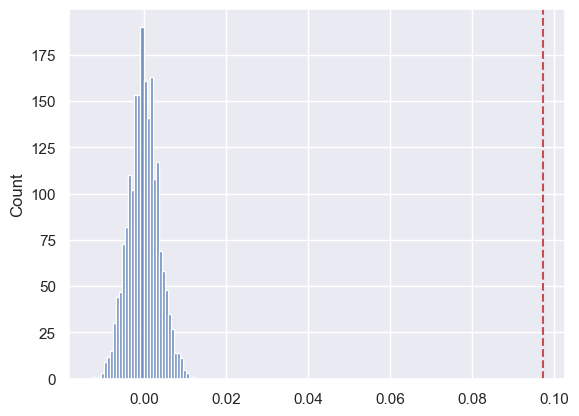

Values more extreme than observed: 0
p-value: 0.0
H0 rejected | the observed result is statistically significant | p-value <= alpha


In [7]:
abtest(df, exp_groups='group', exp_metric='clicked_article')

3. Come up with your own AB test and, after designing the experiment: 
    1. use an appropriate probability distribution to create a synthetic dataset that supports your experiment (create your own fake data); 
    2. using a permutation test, run an hypothesis test and state your conclusions (you will already know the result from step 1 of course). 